## DATA PREPARATION

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


## DATA VISUALIZATION

Creating a dictionary to store all the diferent type of images 

In [ ]:
fashion_items = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

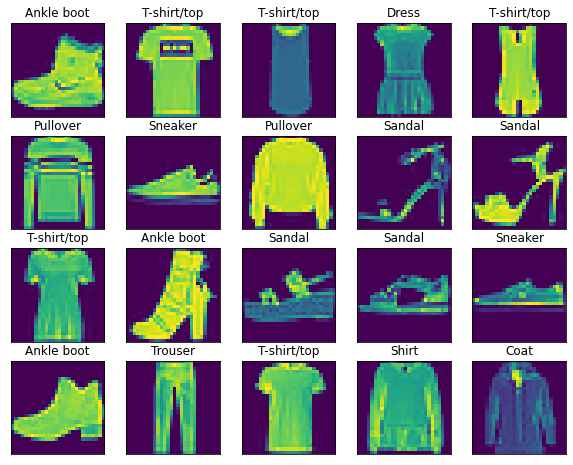

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i] )
    plt.title( fashion_items[(y_train[i]) ])
    plt.xticks([])
    plt.yticks([])

## DATA PREPROCESSING

In [3]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [4]:
# one hot encode target values
# one hot encode target values
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [5]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [6]:
X_train, X_test = prep_pixels(X_train, X_test)

## TRAINING AND EVALUATION

## Building baseline model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
scores, histories = list(), list()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4282 - accuracy: 0.8501 - val_loss: 0.3292 - val_accuracy: 0.8786
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2786 - accuracy: 0.9003 - val_loss: 0.3069 - val_accuracy: 0.8841
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2340 - accuracy: 0.9146 - val_loss: 0.2596 - val_accuracy: 0.9029
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2052 - accuracy: 0.9244 - val_loss: 0.2711 - val_accuracy: 0.9019
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1817 - accuracy: 0.9328 - val_loss: 0.2622 - val_accuracy: 0.9039
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1611 - accuracy: 0.9406 - val_loss: 0.2662 - val_accuracy: 0.9073
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9464 - val_loss: 0.2559 - val_accuracy: 0.9146
Epoch 

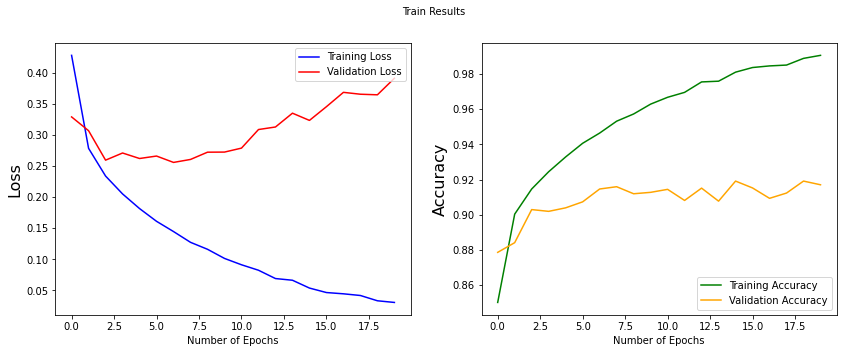

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 99.05499815940857
Train loss of the model:  0.030595794320106506
Validation accuracy of the model:  0.9169999957084656
Validation loss of the model:  0.3913671374320984
Test Loss: 0.39136719703674316
Test Accuracy: 0.9169999957084656


The validation loss is very high and and the validation accuracy could be better thus we will be improvising the model

# Improving the model

## 1. Adding more padding convolutions and filters

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
scores, histories = list(), list()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/10
600/600 [==============================] - 12s 7ms/step - loss: 0.4266 - accuracy: 0.8444 - val_loss: 0.3159 - val_accuracy: 0.8846
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2680 - accuracy: 0.9011 - val_loss: 0.2629 - val_accuracy: 0.9039
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2197 - accuracy: 0.9191 - val_loss: 0.2438 - val_accuracy: 0.9119
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1871 - accuracy: 0.9314 - val_loss: 0.2349 - val_accuracy: 0.9148
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1611 - accuracy: 0.9399 - val_loss: 0.2243 - val_accuracy: 0.9173
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1400 - accuracy: 0.9479 - val_loss: 0.2241 - val_accuracy: 0.9219
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1198 - accuracy: 0.9547 - val_loss: 0.2366 - val_accuracy: 0.9211
Epoch

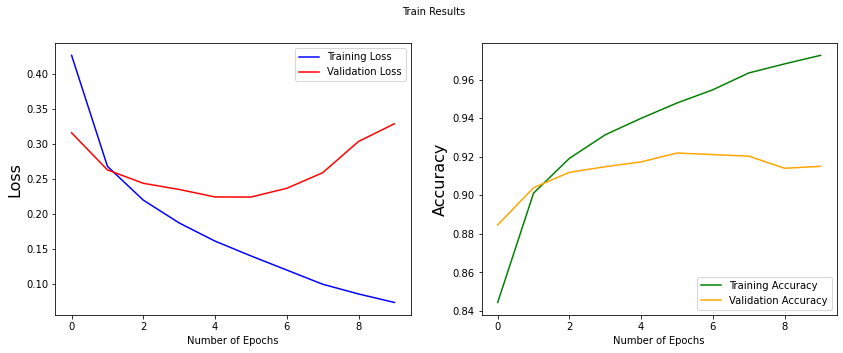

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 97.25666642189026
Train loss of the model:  0.07350565493106842
Validation accuracy of the model:  0.9150000214576721
Validation loss of the model:  0.32883408665657043
Test Loss: 0.32883399724960327
Test Accuracy: 0.9150000214576721


This did not really change the values much so we will now proceed to regularization techniques

## 2. Increased padding and filters + Dropout + Batch Normalization 


In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
scores, histories = list(), list()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.5480 - accuracy: 0.8027 - val_loss: 0.3572 - val_accuracy: 0.8661
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3700 - accuracy: 0.8634 - val_loss: 0.3366 - val_accuracy: 0.8780
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3231 - accuracy: 0.8806 - val_loss: 0.3096 - val_accuracy: 0.8824
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2942 - accuracy: 0.8908 - val_loss: 0.2871 - val_accuracy: 0.8926
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2752 - accuracy: 0.8972 - val_loss: 0.2439 - val_accuracy: 0.9118
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2583 - accuracy: 0.9041 - val_loss: 0.2455 - val_accuracy: 0.9070
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2511 - accuracy: 0.9063 - val_loss: 0.2543 - val_accuracy: 0.9049
Epoch

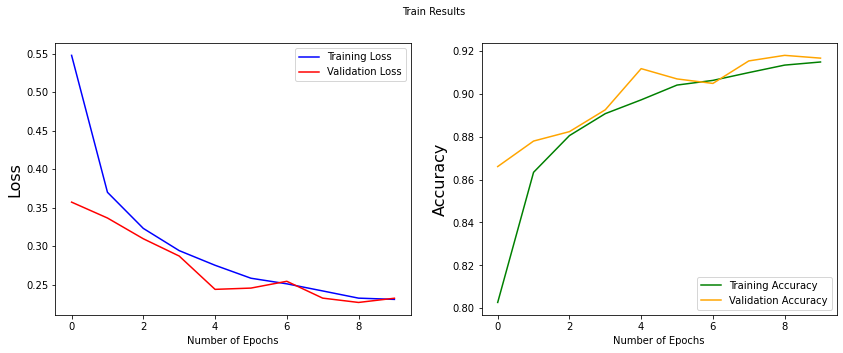

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 91.4900004863739
Train loss of the model:  0.23082219064235687
Validation accuracy of the model:  0.916700005531311
Validation loss of the model:  0.2323167473077774
Test Loss: 0.232316792011261
Test Accuracy: 0.916700005531311


The scores look good and based on the graphs, it seems to perform better with increasing number of epoch and thus we wil be increasing the number of epoch to 30

In [ ]:
# Fitting with 30 epoch

In [ ]:
scores, histories = list(), list()
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2260 - accuracy: 0.9153 - val_loss: 0.2514 - val_accuracy: 0.9062
Epoch 2/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2144 - accuracy: 0.9209 - val_loss: 0.2340 - val_accuracy: 0.9144
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2130 - accuracy: 0.9217 - val_loss: 0.2346 - val_accuracy: 0.9167
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2044 - accuracy: 0.9234 - val_loss: 0.2212 - val_accuracy: 0.9202
Epoch 5/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2055 - accuracy: 0.9234 - val_loss: 0.2285 - val_accuracy: 0.9189
Epoch 6/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1980 - accuracy: 0.9275 - val_loss: 0.2164 - val_accuracy: 0.9211
Epoch 7/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1975 - accuracy: 0.9273 - val_loss: 0.1999 - val_accuracy: 0.9293
Epoch 

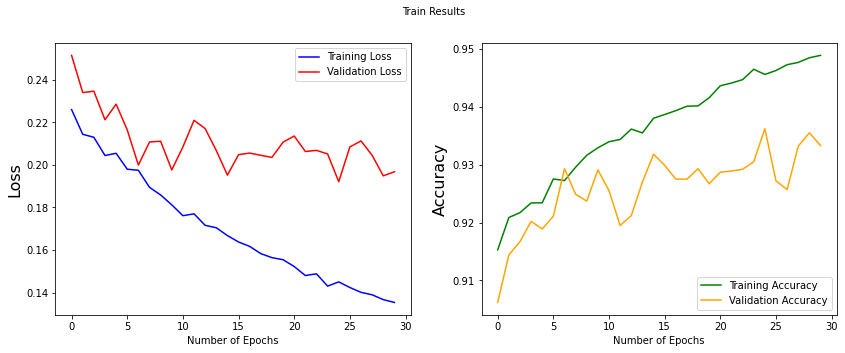

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 94.88833546638489
Train loss of the model:  0.1354120969772339
Validation accuracy of the model:  0.9333000183105469
Validation loss of the model:  0.19677622616291046
Test Loss: 0.19677621126174927
Test Accuracy: 0.9333000183105469


The test accuracy is actually higher now so it shows that dropout + batch normalization actually does improve performance

## 3. Increased padding and filters + Dropout + Batch Normalization  + Data Augmentation

In [7]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [9]:
scores, histories = list(), list()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),shuffle=True, epochs=10, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/10
600/600 - 31s - loss: 0.7181 - accuracy: 0.7329 - val_loss: 0.4821 - val_accuracy: 0.8196 - 31s/epoch - 52ms/step
Epoch 2/10
600/600 - 22s - loss: 0.4949 - accuracy: 0.8112 - val_loss: 0.3729 - val_accuracy: 0.8637 - 22s/epoch - 37ms/step
Epoch 3/10
600/600 - 21s - loss: 0.4380 - accuracy: 0.8341 - val_loss: 0.3650 - val_accuracy: 0.8614 - 21s/epoch - 35ms/step
Epoch 4/10
600/600 - 21s - loss: 0.4161 - accuracy: 0.8415 - val_loss: 0.3516 - val_accuracy: 0.8673 - 21s/epoch - 36ms/step
Epoch 5/10
600/600 - 22s - loss: 0.3861 - accuracy: 0.8536 - val_loss: 0.3785 - val_accuracy: 0.8567 - 22s/epoch - 36ms/step
Epoch 6/10
600/600 - 21s - loss: 0.3759 - accuracy: 0.8579 - val_loss: 0.3159 - val_accuracy: 0.8832 - 21s/epoch - 35ms/step
Epoch 7/10
600/600 - 22s - loss: 0.3610 - accuracy: 0.8647 - val_loss: 0.3080 - val_accuracy: 0.8899 - 22s/epoch - 37ms/step
Epoch 8/10
600/600 - 22s - loss: 0.3474 - accuracy: 0.8698 - val_loss: 0.2739 - val_accuracy: 0.8997 - 22s/epoch - 36ms/step


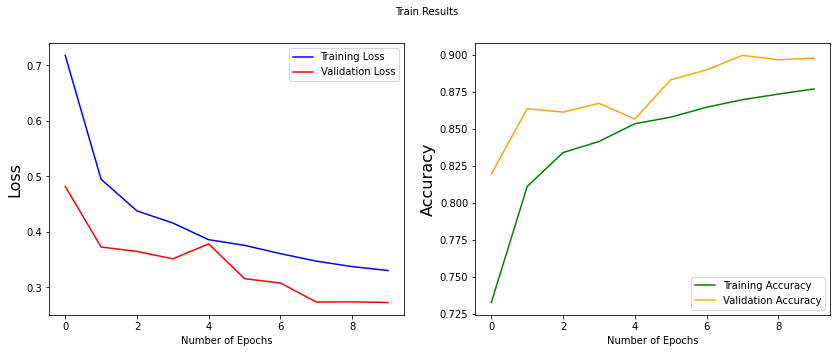

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 87.70333528518677
Train loss of the model:  0.3305641710758209
Validation accuracy of the model:  0.8978999853134155
Validation loss of the model:  0.2730759382247925
Test Loss: 0.2730759382247925
Test Accuracy: 0.8978999853134155


The scores look good and based on the graphs, it seems to perform better with increasing number of epoch and thus we wil be increasing the number of epoch to 30

In [ ]:
# Fitting in with 30 epoch

In [ ]:
scores, histories = list(), list()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),shuffle=True, epochs=30, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

Epoch 1/30
600/600 - 22s - loss: 0.7205 - accuracy: 0.7313 - val_loss: 0.5384 - val_accuracy: 0.7983 - 22s/epoch - 36ms/step
Epoch 2/30
600/600 - 20s - loss: 0.5059 - accuracy: 0.8041 - val_loss: 0.3950 - val_accuracy: 0.8497 - 20s/epoch - 33ms/step
Epoch 3/30
600/600 - 20s - loss: 0.4573 - accuracy: 0.8264 - val_loss: 0.3445 - val_accuracy: 0.8714 - 20s/epoch - 34ms/step
Epoch 4/30
600/600 - 22s - loss: 0.4143 - accuracy: 0.8426 - val_loss: 0.3686 - val_accuracy: 0.8589 - 22s/epoch - 37ms/step
Epoch 5/30
600/600 - 22s - loss: 0.3931 - accuracy: 0.8523 - val_loss: 0.3267 - val_accuracy: 0.8777 - 22s/epoch - 37ms/step
Epoch 6/30
600/600 - 20s - loss: 0.3743 - accuracy: 0.8583 - val_loss: 0.3313 - val_accuracy: 0.8770 - 20s/epoch - 34ms/step
Epoch 7/30
600/600 - 21s - loss: 0.3566 - accuracy: 0.8682 - val_loss: 0.3417 - val_accuracy: 0.8713 - 21s/epoch - 35ms/step
Epoch 8/30
600/600 - 20s - loss: 0.3489 - accuracy: 0.8695 - val_loss: 0.2893 - val_accuracy: 0.8906 - 20s/epoch - 34ms/step


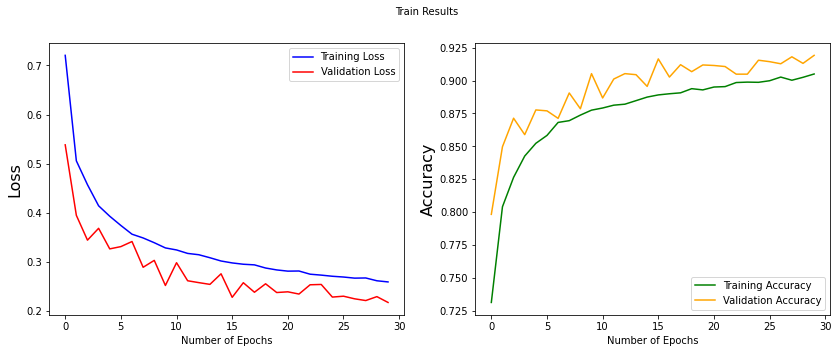

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model: 90.50333499908447
Train loss of the model:  0.259476900100708
Validation accuracy of the model:  0.9192000031471252
Validation loss of the model:  0.2177153378725052
Test Loss: 0.2177153378725052
Test Accuracy: 0.9192000031471252


The train and test accuracy for dropout + batch normalization is higher than the train and test accuracy for dropout + batch normalization + data augmentation. Hence, for the finalized model we will be using dropout + batch normalization

# Final Model - Increased Padding and filters + Dropout + Batch Normalization

Since it performs better with increasing epoch , we will fit the model with 40 epoch

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
scores, histories = list(), list()
history = model.fit(X_train, y_train, epochs= 40, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)


Epoch 1/40
600/600 [==============================] - 9s 14ms/step - loss: 0.6038 - accuracy: 0.7902 - val_loss: 0.4043 - val_accuracy: 0.8803
Epoch 2/40
600/600 [==============================] - 8s 14ms/step - loss: 0.3486 - accuracy: 0.8752 - val_loss: 0.2704 - val_accuracy: 0.9037
Epoch 3/40
600/600 [==============================] - 9s 14ms/step - loss: 0.3006 - accuracy: 0.8907 - val_loss: 0.2451 - val_accuracy: 0.9091
Epoch 4/40
600/600 [==============================] - 8s 14ms/step - loss: 0.2723 - accuracy: 0.9007 - val_loss: 0.2328 - val_accuracy: 0.9123
Epoch 5/40
600/600 [==============================] - 8s 14ms/step - loss: 0.2517 - accuracy: 0.9078 - val_loss: 0.2287 - val_accuracy: 0.9153
Epoch 6/40
600/600 [==============================] - 8s 14ms/step - loss: 0.2373 - accuracy: 0.9127 - val_loss: 0.2225 - val_accuracy: 0.9204
Epoch 7/40
600/600 [==============================] - 9s 14ms/step - loss: 0.2236 - accuracy: 0.9182 - val_loss: 0.2266 - val_accuracy: 0.9173

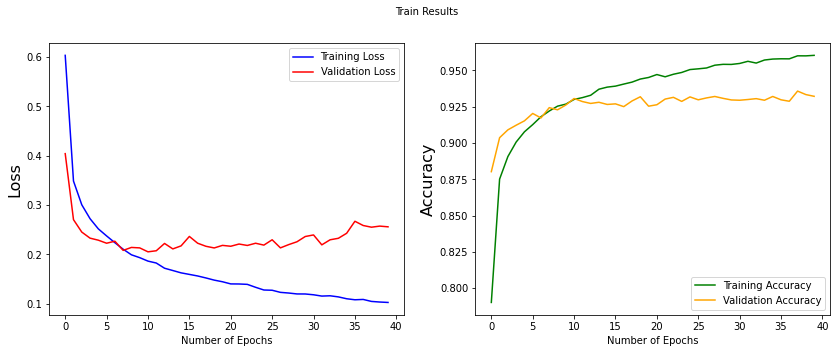

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Train accuracy of the model:  0.9604166746139526
Train loss of the model:  0.10234038531780243
Validation accuracy of the model:  0.932200014591217
Validation loss of the model:  0.2558209002017975
Test Loss: 0.2558209002017975
Test Accuracy: 0.932200014591217


The train accuracy is amazing at 96% and the validation accuracy is also very high at 93%

# Results

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 1s 2ms/step


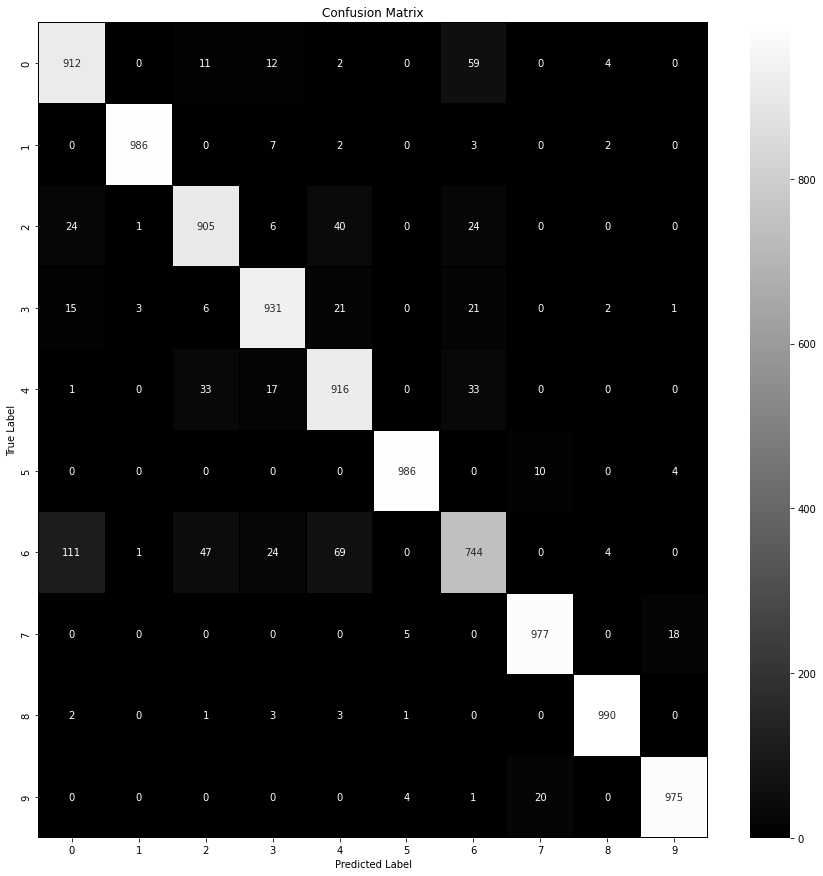

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 88 out of 1000
Percentage of True Prediction: 91.20%
***********************************************************
Class: 1
Number of Wrong Prediction: 14 out of 1000
Percentage of True Prediction: 98.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 95 out of 1000
Percentage of True Prediction: 90.50%
***********************************************************
Class: 3
Number of Wrong Prediction: 69 out of 1000
Percentage of True Prediction: 93.10%
***********************************************************
Class: 4
Number of Wrong Prediction: 84 out of 1000
Percentage of True Prediction: 91.60%
***********************************************************
Class: 5
Number of Wrong Prediction: 14 out of 1000
Percentage of True Prediction: 98.60%
***********************************************************
Class: 6
Number of Wrong Prediction: 256 out of 1000
Percentage of True Prediction: 74.40%
*********

Our model is really good as the percentage of true predictions is really high with the highest being 99%